#Aluno: Gustavo Silva
##Turma: IAA2020

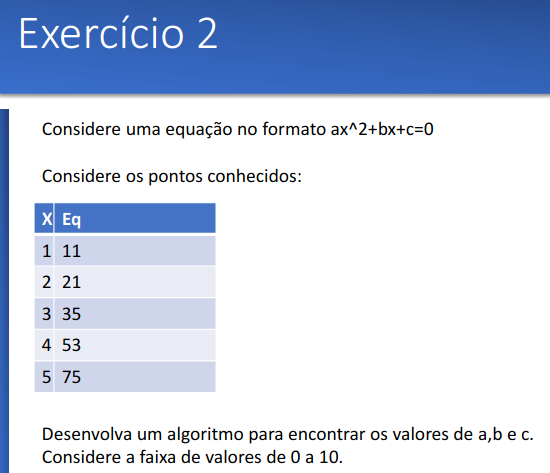

In [113]:
from random import randint
from math import sqrt, floor, ceil

# Definindo algumas constantes:
pontos_conhecidos = [(1, 11), (2, 21), (3, 35), (4, 53), (5, 75)]
min_val = 0
max_val = 10
perc_reproducao = 60
perc_mutacao = 1
num_geracoes = 30

# Função para gerar um indivíduo aleatoreamente:
def gerar_individuo():
  return tuple(randint(min_val, max_val) for _ in range(3))

# Função para limitar os valores dentro da faixa pré-definida.
def normalizar(individuo):
  if individuo < min_val:
    return min_val
  if individuo > max_val:
    return max_val
  return individuo

# Função para avaliar um indivíduo (quanto menor, melhor).
def avaliar(individuo):
  #a * (x**2) + (b * x) + c=0
  a, b, c = individuo

  erro = 0
  for x, expected in pontos_conhecidos:
    resultado = a * (x**2) + (b*x) + c
    erro += sqrt((expected - resultado)**2)

  return erro

# Função para selecionar um indivíduo em uma lista de candidatos usando torneio.
def selecionar(candidatos):
  num_candidatos = len(candidatos)
  
  random_idx = randint(0, num_candidatos -1)
  individuo_1 = candidatos.pop(random_idx)

  random_idx = randint(0, num_candidatos -2)
  individuo_2 = candidatos.pop(random_idx)

  if individuo_1[1] < individuo_2[1]:
    candidatos.append(individuo_2)
    return individuo_1[0]
  else: 
    candidatos.append(individuo_1)
    return individuo_2[0]

# Função para gerar dois filhos de um pai e mãe.
def cross_over(pai, mae):
  pai_binary = ""
  for feature in pai:
    pai_binary += "{0:b}".format(feature).zfill(4)

  mae_binary = ""
  for feature in mae:
    mae_binary += "{0:b}".format(feature).zfill(4)
  
  ponto_corte = randint(1, (len(pai_binary)-1))
  ponto_corte2 = ponto_corte - len(pai_binary)

  filho_1 = pai_binary[:ponto_corte] + mae_binary[ponto_corte2:]
  filho_2 = mae_binary[:ponto_corte] + pai_binary[ponto_corte2:]

  retorno = []

  for filho in [filho_1, filho_2]:
    a = normalizar(int(filho[0:4], 2))
    b = normalizar(int(filho[4:8], 2))
    c = normalizar(int(filho[8:12], 2))
    retorno.append((a, b, c))

  return retorno

# Função para realizar a mutação de um indivíduo.
def mutar(individuo):
  individuo_binary = ""
  for feature in individuo:
    individuo_binary += "{0:b}".format(feature).zfill(4)

  gene_mutacao = randint(0,len(individuo_binary) - 1)

  mutacao = '1' if individuo_binary[gene_mutacao] == '0' else '0'
  individuo_binary = individuo_binary[:gene_mutacao] + mutacao + individuo_binary[gene_mutacao + 1:]

  a = normalizar(int(individuo_binary[0:4], 2))
  b = normalizar(int(individuo_binary[4:8], 2))
  c = normalizar(int(individuo_binary[8:12], 2))
  
  return (a, b, c)


# Criando uma população inicial de 10 indivíduos.
populacao = [gerar_individuo() for _ in range(10)]

# Laço para as geracoes
for i in range(num_geracoes):
  # Avaliando os membros da população (quanto menor o score, melhor!).
  avaliacao = [avaliar(individuo) for individuo in populacao]
  menor_score = avaliacao.index(min(avaliacao))
  print('Geração ' + str(i) + ' - melhor indivíduo: ',populacao[menor_score])
  
  # Caso consigamos o score '0', significa que chegamos na solução perfeita!
  if avaliacao[menor_score] == 0:
    print('\nAlgorítmos genéticos são incríveis! Encontrei a solução na geração: ' + str(i))
    break

  candidatos = list(zip(populacao, avaliacao))
  num_candidatos = len(candidatos)
  filhos = []
  # Garantindo que 60% da população se reproduza.
  while len(candidatos) > 2 and len(candidatos) > floor(num_candidatos * ((perc_reproducao - 100)/100)):
    # Selecionando um pai e uma mãe.
    pai = selecionar(candidatos)
    mae = selecionar(candidatos)
    # Gerando dois filhos.
    filhos += cross_over(pai, mae)

  # Realizando mutação em 1% da população.
  num_mutacoes = ceil(len(filhos) * (perc_mutacao/100))
  for _ in range(num_mutacoes):
    random_idx = randint(0, len(filhos)-1)
    o_escolhido = filhos[random_idx]
    mutante = mutar(o_escolhido)
    filhos[random_idx] = mutante
  
  # Adicionando os filhos à população:
  populacao += filhos






Geração 0 - melhor indivíduo:  (1, 10, 3)
Geração 1 - melhor indivíduo:  (1, 10, 3)
Geração 2 - melhor indivíduo:  (2, 5, 4)
Geração 3 - melhor indivíduo:  (2, 5, 4)
Geração 4 - melhor indivíduo:  (2, 5, 4)
Geração 5 - melhor indivíduo:  (2, 5, 2)
Geração 6 - melhor indivíduo:  (2, 5, 2)
Geração 7 - melhor indivíduo:  (2, 4, 4)
Geração 8 - melhor indivíduo:  (2, 4, 4)
Geração 9 - melhor indivíduo:  (2, 4, 4)
Geração 10 - melhor indivíduo:  (2, 4, 4)
Geração 11 - melhor indivíduo:  (2, 4, 4)
Geração 12 - melhor indivíduo:  (2, 4, 5)

Algorítmos genéticos são incríveis! Encontrei a solução na geração: 12
